我们将使用来源于网络电影数据库（Internet Movie Database）的 IMDB 数据集（IMDB dataset），其包含 50,000 条影评文本。从该数据集切割出的25,000条评论用作训练，另外 25,000 条用作测试。训练集与测试集是平衡的（balanced），意味着它们包含相等数量的积极和消极评论。

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.0.0


# 下载 IMDB 数据集
## IMDB 数据集已经打包在 Tensorflow 中。该数据集已经经过预处理，评论（单词序列）已经被转换为整数序列，其中每个整数表示字典中的特定单词。

以下代码将下载 IMDB 数据集到您的机器上（如果您已经下载过将从缓存中复制）：

In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)#注意顺序与sklearn不同，#参数 num_words=10000 保留了训练数据中最常出现的 10,000 个单词。为了保持数据规模的可管理性，低频词将被丢弃

# 探索数据
### 让我们花一点时间来了解数据格式。该数据集是经过预处理的：每个样本都是一个表示影评中词汇的整数数组。每个标签都是一个值为 0 或 1 的整数值，其中 0 代表消极评论，1 代表积极评论。

In [3]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [5]:
print(train_data[5000])


[1, 13, 104, 14, 2856, 77, 6, 542, 20, 5, 49, 7, 94, 531, 26, 608, 21, 11, 226, 45, 6, 503, 20, 172, 44, 4, 114, 531, 26, 608, 21, 12, 47, 450, 1512, 5, 2, 15, 152, 179, 763, 56, 116, 9, 669, 608, 207, 110, 433, 7, 14, 99, 10, 10, 4, 454, 732, 4, 651, 19, 1880, 1953, 11, 4, 2092, 231, 646, 21, 484, 1744, 2980, 143, 49, 392, 2, 11, 550, 1270, 646, 40, 4, 9331, 69, 115, 110, 6439, 159, 12, 214, 1076, 128, 39, 50, 21, 24, 76, 10, 10, 48, 335, 2146, 851, 14, 79, 160, 31, 99, 5, 361, 14, 31, 17, 6, 2272, 56, 401, 1398, 364, 5, 12, 238, 157, 18, 25]


In [7]:
len(train_data[0]), len(train_data[5000])
#电影评论可能具有不同的长度。以下代码显示了第一条和第二条评论的中单词数量。
#由于神经网络的输入必须是统一的长度，我们稍后需要解决这个问题。

(218, 124)

In [29]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [15]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [16]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [28]:
reverse_word_index[4]

'the'

# 将整数转换回单词
## 了解如何将整数转换回文本对您可能是有帮助的。这里我们将创建一个辅助函数来查询一个包含了整数到字符串映射的字典对象

In [30]:
# 一个映射单词到整数索引的词典
word_index = imdb.get_word_index()
# 保留第一个索引
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


## 现在我们可以使用 decode_review 函数来显示首条评论的文本：


In [31]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

# 准备数据
## 由于电影评论长度必须相同，我们将使用 pad_sequences 函数来使长度标准化：

In [32]:


train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,#sequences：浮点数或整数构成的两层嵌套列表
                                                       value=word_index["<PAD>"],#value：浮点数，此值将在填充时代替默认的填充值0
                                                       padding='post',#padding：‘pre’或‘post’，确定当需要补0时，在序列的起始还是结尾补,默认‘pre’
                                                       maxlen=256)#maxlen：None或整数，为序列的最大长度。大于此长度的序列将被截短，小于此长度的序列将在后部填0.在命名实体识别任务中，主要是指句子的最大长度



#dtype：返回的numpy array的数据类型
#truncating：‘pre’或‘post’，确定当需要截断序列时，从起始还是结尾截断


In [33]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [34]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

# 构建模型
## 神经网络由堆叠的层来构建，这需要从两个主要方面来进行体系结构决策：

## 模型里有多少层？
## 每个层里有多少隐层单元（hidden units）？
### 在此样本中，输入数据包含一个单词索引的数组。要预测的标签为 0 或 1。让我们来为该问题构建一个模型：

In [19]:
# 输入形状是用于电影评论的词汇数目（10,000 词）
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()
#层按顺序堆叠以构建分类器：

#1.第一层是嵌入（Embedding）层。该层采用整数编码的词汇表，并查找每个词索引的嵌入向量（embedding vector）。
#这些向量是通过模型训练学习到的。向量向输出数组增加了一个维度。得到的维度为：(batch, sequence, embedding)。
#2.接下来，GlobalAveragePooling1D 将通过对序列维度求平均值来为每个样本返回一个定长输出向量。
#这允许模型以尽可能最简单的方式处理变长输入。
#3.该定长输出向量通过一个有 16 个隐层单元的全连接（Dense）层传输。
#4.最后一层与单个输出结点密集连接。使用 Sigmoid 激活函数，其函数值为介于 0 与 1 之间的浮点数，表示概率或置信度。

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


##  隐层单元
### 上述模型在输入输出之间有两个中间层或“隐藏层”。输出（单元，结点或神经元）的数量即为层表示空间的维度。换句话说，是学习内部表示时网络所允许的自由度。

### 如果模型具有更多的隐层单元（更高维度的表示空间）和/或更多层，则可以学习到更复杂的表示。但是，这会使网络的计算成本更高，并且可能导致学习到不需要的模式——一些能够在训练数据上而不是测试数据上改善性能的模式。这被称为过拟合（overfitting），我们稍后会对此进行探究。

# 损失函数与优化器
## 一个模型需要损失函数和优化器来进行训练。由于这是一个二分类问题且模型输出概率值（一个使用 sigmoid 激活函数的单一单元层），我们将使用 binary_crossentropy 损失函数。

## 这不是损失函数的唯一选择，例如，您可以选择 mean_squared_error 。但是，一般来说 binary_crossentropy 更适合处理概率——它能够度量概率分布之间的“距离”，或者在我们的示例中，指的是度量 ground-truth 分布与预测值之间的“距离”。

## 稍后，当我们研究回归问题（例如，预测房价）时，我们将介绍如何使用另一种叫做均方误差的损失函数。

## 现在，配置模型来使用优化器和损失函数：

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 创建一个验证集
## 在训练时，我们想要检查模型在未见过的数据上的准确率（accuracy）。通过从原始训练数据中分离 10,000 个样本来创建一个验证集。（为什么现在不使用测试集？我们的目标是只使用训练数据来开发和调整模型，然后只使用一次测试数据来评估准确率（accuracy））。

## sklearn.model_selection.train_test_split

In [21]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

# 训练模型
## 以 512 个样本的 mini-batch 大小迭代 40 个 epoch 来训练模型。这是指对 x_train 和 y_train 张量中所有样本的的 40 次迭代。在训练过程中，监测来自验证集的 10,000 个样本上的损失值（loss）和准确率（accuracy）：

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 7s 448us/sample - loss: 0.6916 - accuracy: 0.5731 - val_loss: 0.6894 - val_accuracy: 0.6022
Epoch 2/40
15000/15000 [==============================] - 4s 247us/sample - loss: 0.6855 - accuracy: 0.6792 - val_loss: 0.6815 - val_accuracy: 0.7493
Epoch 3/40
15000/15000 [==============================] - 4s 246us/sample - loss: 0.6740 - accuracy: 0.7531 - val_loss: 0.6676 - val_accuracy: 0.7422
Epoch 4/40
15000/15000 [==============================] - 4s 246us/sample - loss: 0.6534 - accuracy: 0.7685 - val_loss: 0.6440 - val_accuracy: 0.7639
Epoch 5/40
15000/15000 [==============================] - 4s 247us/sample - loss: 0.6226 - accuracy: 0.7873 - val_loss: 0.6112 - val_accuracy: 0.7863
Epoch 6/40
15000/15000 [==============================] - 4s 247us/sample - loss: 0.5840 - accuracy: 0.8062 - val_loss: 0.5734 - val_accuracy: 0.8049
Epoch 7/40
15000/15000 [==========================

## 评估模型
### 我们来看一下模型的性能如何。将返回两个值。损失值（loss）（一个表示误差的数字，值越低越好）与准确率（accuracy）。

In [27]:
loss,acc = model.evaluate(test_data,  test_labels, verbose=2)

print('loss',loss)
print('acc',acc)
#这种十分朴素的方法得到了约 87% 的准确率（accuracy）。若采用更好的方法，模型的准确率应当接近 95%

25000/1 - 2s - loss: 0.3267 - accuracy: 0.8717
loss 0.330005802731514
acc 0.87168


# 创建一个准确率（accuracy）和损失值（loss）随时间变化的图表
### model.fit() 返回一个 History 对象，该对象包含一个字典，其中包含训练阶段所发生的一切事件：

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## 有四个条目：在训练和验证期间，每个条目对应一个监控指标。我们可以使用这些条目来绘制训练与验证过程的损失值（loss）和准确率（accuracy），以便进行比较。

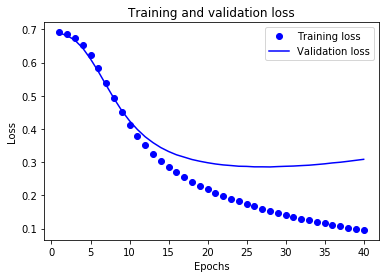

In [33]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

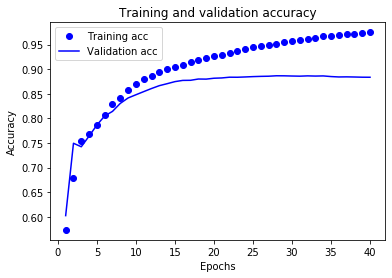

In [36]:
plt.clf()   # 清除数字

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

在该图中，点代表训练损失值（loss）与准确率（accuracy），实线代表验证损失值（loss）与准确率（accuracy）。

注意训练损失值随每一个 epoch 下降而训练准确率（accuracy）随每一个 epoch 上升。这在使用梯度下降优化时是可预期的——理应在每次迭代中最小化期望值。

验证过程的损失值（loss）与准确率（accuracy）的情况却并非如此——它们似乎在 20 个 epoch 后达到峰值。这是过拟合的一个实例：模型在训练数据上的表现比在以前从未见过的数据上的表现要更好。在此之后，模型过度优化并学习特定于训练数据的表示，而不能够泛化到测试数据。

### 对于这种特殊情况，我们可以通过在 20 个左右的 epoch 后停止训练来避免过拟合。稍后，您将看到如何通过回调自动执行此操作。

# 演示保存模型

In [49]:
def create_model():
    vocab_size = 10000

    model = keras.Sequential([
        keras.layers.Embedding(vocab_size, 16),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model
    
    

In [50]:
# 创建一个新的模型实例
model = create_model()

# 训练模型
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

# 将整个模型保存为HDF5文件
model.save('data/text_model.h5')

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 412us/sample - loss: 0.6924 - accuracy: 0.5819 - val_loss: 0.6911 - val_accuracy: 0.6458
Epoch 2/20
15000/15000 [==============================] - 4s 260us/sample - loss: 0.6885 - accuracy: 0.7150 - val_loss: 0.6852 - val_accuracy: 0.7310
Epoch 3/20
15000/15000 [==============================] - 4s 265us/sample - loss: 0.6788 - accuracy: 0.7483 - val_loss: 0.6727 - val_accuracy: 0.7377
Epoch 4/20
15000/15000 [==============================] - 4s 249us/sample - loss: 0.6610 - accuracy: 0.7606 - val_loss: 0.6514 - val_accuracy: 0.7547
Epoch 5/20
15000/15000 [==============================] - 4s 244us/sample - loss: 0.6329 - accuracy: 0.7793 - val_loss: 0.6208 - val_accuracy: 0.7610
Epoch 6/20
15000/15000 [==============================] - 4s 245us/sample - loss: 0.5949 - accuracy: 0.7985 - val_loss: 0.5823 - val_accuracy: 0.7940
Epoch 7/20
15000/15000 [==========================

# 读取模型

In [51]:
# 重新创建完全相同的模型，包括其权重和优化程序
new_model = keras.models.load_model('data/text_model.h5')

# 显示网络结构
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [53]:
loss, acc = new_model.evaluate(x_val,  y_val, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/1 - 1s - loss: 0.2664 - accuracy: 0.8808
Restored model, accuracy: 88.08%


## 这项技术可以保存一切:

### 权重
### 模型配置(结构)
### 优化器配置
### Keras 通过检查网络结构来保存模型。
## 目前，它无法保存 Tensorflow 优化器（调用自 tf.train）。使用这些的时候，您需要在加载后重新编译模型，否则您将失去优化器的状态。